# MSDS 7331 Data Mining: Project1
Team: Andrew Abbott, Patrick McDevitt, Preeti Swaminathan, Vivek Bejugama    


## Online News Popularity Data Set

We are using online news popularity dataset from USI machine learning repository. The dataset is a collection of 61 attributes of about 39,797 articles published by Mashable (www.mashable.com) and not the article itself. The data was collected on January 8, 2015

We intend to mine this data to understand what parameter influence an article to be shared more than others. What kind of associations different attributes have for some article to be more popular than others. 

The data is located at https://archive.ics.uci.edu/ml/datasets/Online+News+Popularity

Attribute Information:

     0. url:                           URL of the article
     1. timedelta:                     Days between the article publication and the dataset acquisition
     2. n_tokens_title:                Number of words in the title
     3. n_tokens_content:              Number of words in the content
     4. n_unique_tokens:               Rate of unique words in the content
     5. n_non_stop_words:              Rate of non-stop words in the content
     6. n_non_stop_unique_tokens:      Rate of unique non-stop words in the content
     7. num_hrefs:                     Number of links
     8. num_self_hrefs:                Number of links to other articles published by Mashable
     9. num_imgs:                      Number of images
    10. num_videos:                    Number of videos
    11. average_token_length:          Average length of the words in the content
    12. num_keywords:                  Number of keywords in the metadata
    13. data_channel_is_lifestyle:     Is data channel 'Lifestyle'?
    14. data_channel_is_entertainment: Is data channel 'Entertainment'?
    15. data_channel_is_bus:           Is data channel 'Business'?
    16. data_channel_is_socmed:        Is data channel 'Social Media'?
    17. data_channel_is_tech:          Is data channel 'Tech'?
    18. data_channel_is_world:         Is data channel 'World'?
    19. kw_min_min:                    Worst keyword (min. shares)
    20. kw_max_min:                    Worst keyword (max. shares)
    21. kw_avg_min:                    Worst keyword (avg. shares)
    22. kw_min_max:                    Best keyword (min. shares)
    23. kw_max_max:                    Best keyword (max. shares)
    24. kw_avg_max:                    Best keyword (avg. shares)
    25. kw_min_avg:                    Avg. keyword (min. shares)
    26. kw_max_avg:                    Avg. keyword (max. shares)
    27. kw_avg_avg:                    Avg. keyword (avg. shares)
    28. self_reference_min_shares:     Min. shares of referenced articles in Mashable
    29. self_reference_max_shares:     Max. shares of referenced articles in Mashable
    30. self_reference_avg_sharess:    Avg. shares of referenced articles in Mashable
    31. weekday_is_monday:             Was the article published on a Monday?
    32. weekday_is_tuesday:            Was the article published on a Tuesday?
    33. weekday_is_wednesday:          Was the article published on a Wednesday?
    34. weekday_is_thursday:           Was the article published on a Thursday?
    35. weekday_is_friday:             Was the article published on a Friday?
    36. weekday_is_saturday:           Was the article published on a Saturday?
    37. weekday_is_sunday:             Was the article published on a Sunday?
    38. is_weekend:                    Was the article published on the weekend?
    39. LDA_00:                        Closeness to LDA topic 0
    40. LDA_01:                        Closeness to LDA topic 1
    41. LDA_02:                        Closeness to LDA topic 2
    42. LDA_03:                        Closeness to LDA topic 3
    43. LDA_04:                        Closeness to LDA topic 4
    44. global_subjectivity:           Text subjectivity
    45. global_sentiment_polarity:     Text sentiment polarity
    46. global_rate_positive_words:    Rate of positive words in the content
    47. global_rate_negative_words:    Rate of negative words in the content
    48. rate_positive_words:           Rate of positive words among non-neutral tokens
    49. rate_negative_words:           Rate of negative words among non-neutral tokens
    50. avg_positive_polarity:         Avg. polarity of positive words
    51. min_positive_polarity:         Min. polarity of positive words
    52. max_positive_polarity:         Max. polarity of positive words
    53. avg_negative_polarity:         Avg. polarity of negative  words
    54. min_negative_polarity:         Min. polarity of negative  words
    55. max_negative_polarity:         Max. polarity of negative  words
    56. title_subjectivity:            Title subjectivity
    57. title_sentiment_polarity:      Title polarity
    58. abs_title_subjectivity:        Absolute subjectivity level
    59. abs_title_sentiment_polarity:  Absolute polarity level
    60. shares:                        Number of shares (target)

In [1]:
#importing Required Packages
import pandas as pd
import numpy as np

In [2]:
#Import Data from .csv file
df = pd.read_csv('data/OnlineNewsPopularity.csv')  

# Strip leading spaces from column names
df.columns = df.columns.str.strip()
df.head()

# Extract data from the URL 
df['http'], df['blank'], df['mash'], df['year'], df['month'], df['day'], df['title'], df['extra'] = df['url'].str.split('\/', 7).str

del df['http'],df['blank'],df['mash']

In [3]:
# Summary of attributes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39644 entries, 0 to 39643
Data columns (total 66 columns):
url                              39644 non-null object
timedelta                        39644 non-null float64
n_tokens_title                   39644 non-null float64
n_tokens_content                 39644 non-null float64
n_unique_tokens                  39644 non-null float64
n_non_stop_words                 39644 non-null float64
n_non_stop_unique_tokens         39644 non-null float64
num_hrefs                        39644 non-null float64
num_self_hrefs                   39644 non-null float64
num_imgs                         39644 non-null float64
num_videos                       39644 non-null float64
average_token_length             39644 non-null float64
num_keywords                     39644 non-null float64
data_channel_is_lifestyle        39644 non-null float64
data_channel_is_entertainment    39644 non-null float64
data_channel_is_bus              39644 non-null floa

All the variables here are of data type float64. We can convert most of them to integers and boolean
Also there are no missing values in any of the atributes, thus null-handling is not required. 


In [4]:
# Clasifing Atributes for easy analysis 
imp_features = [ 'timedelta','n_tokens_title','n_tokens_content','n_non_stop_words','n_non_stop_unique_tokens',
                'n_unique_tokens','average_token_length','num_keywords','num_hrefs',
                'num_self_hrefs', 'num_imgs', 'num_videos','shares','title_sentiment_polarity','abs_title_subjectivity',
                'abs_title_sentiment_polarity','title_subjectivity']

other_features = ['self_reference_min_shares','self_reference_max_shares','self_reference_avg_sharess',
                      'global_subjectivity','global_sentiment_polarity','global_rate_positive_words',
                      'global_rate_negative_words','rate_positive_words','rate_negative_words',
                      'avg_positive_polarity','min_positive_polarity','max_positive_polarity','avg_negative_polarity',
                      'min_negative_polarity','max_negative_polarity']

catag_features = ['data_channel_is_lifestyle','data_channel_is_entertainment','data_channel_is_bus',
                        'data_channel_is_socmed','data_channel_is_tech','data_channel_is_world',
                        'weekday_is_monday','weekday_is_tuesday','weekday_is_wednesday','weekday_is_thursday',
                        'weekday_is_friday','weekday_is_saturday','weekday_is_sunday','is_weekend']

# Converting the data type to Integer
to_int = ['timedelta','n_tokens_title', 'n_tokens_content','num_keywords',
          'num_hrefs','num_self_hrefs', 'num_imgs', 'num_videos','shares' ]
df[to_int] = df[to_int ].astype(np.int64)

# Converting the data type to boolian 
d = {0:False, 1:True}

for var in catag_features:
    df[var]=df[var].map(d)

In [5]:
# Check for duplicates
df[df.duplicated()]

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares,year,month,day,title,extra


No duplicate rows in the data.

In [6]:
df.head(5)

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares,year,month,day,title,extra
0,http://mashable.com/2013/01/07/amazon-instant-...,731,12,219,0.663594,1.0,0.815385,4,2,1,...,0.500000,-0.187500,0.000000,0.187500,593,2013,01,07,amazon-instant-video-browser,
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731,9,255,0.604743,1.0,0.791946,3,1,1,...,0.000000,0.000000,0.500000,0.000000,711,2013,01,07,ap-samsung-sponsored-tweets,
2,http://mashable.com/2013/01/07/apple-40-billio...,731,9,211,0.575130,1.0,0.663866,3,1,1,...,0.000000,0.000000,0.500000,0.000000,1500,2013,01,07,apple-40-billion-app-downloads,
3,http://mashable.com/2013/01/07/astronaut-notre...,731,9,531,0.503788,1.0,0.665635,9,0,1,...,0.000000,0.000000,0.500000,0.000000,1200,2013,01,07,astronaut-notre-dame-bcs,
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731,13,1072,0.415646,1.0,0.540890,19,19,20,...,0.454545,0.136364,0.045455,0.136364,505,2013,01,07,att-u-verse-apps,


# Simple Statistics of the Data

In [7]:
df[imp_features].describe().T

,count,mean,std,min,25%,50%,75%,max
timedelta,39644.0,354.530471,214.163767,8.0,164.000000,339.000000,542.000000,731.000000
n_tokens_title,39644.0,10.398749,2.114037,2.0,9.000000,10.000000,12.000000,23.000000
n_tokens_content,39644.0,546.514731,471.107508,0.0,246.000000,409.000000,716.000000,8474.000000
n_non_stop_words,39644.0,0.996469,5.231231,0.0,1.000000,1.000000,1.000000,1042.000000
n_non_stop_unique_tokens,39644.0,0.689175,3.264816,0.0,0.625739,0.690476,0.754630,650.000000
n_unique_tokens,39644.0,0.548216,3.520708,0.0,0.470870,0.539226,0.608696,701.000000
average_token_length,39644.0,4.548239,0.844406,0.0,4.478404,4.664082,4.854839,8.041534
num_keywords,39644.0,7.223767,1.909130,1.0,6.000000,7.000000,9.000000,10.000000
num_hrefs,39644.0,10.883690,11.332017,0.0,4.000000,8.000000,14.000000,304.000000
num_self_hrefs,39644.0,3.293638,3.855141,0.0,1.000000,3.000000,4.000000,116.000000


The Data was collected over a period of 8 to 731 days before the collection date.
Number of tokens in title is in the range of 2 to 23 words with SD of 2.1 words.
Number of tokens in content is in the range of 0 to 8474 words with SD of 471 words.
On a average each article was shared 3395 times, with each article being shared atleast once and max of 843k times. 


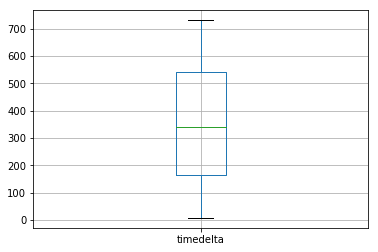

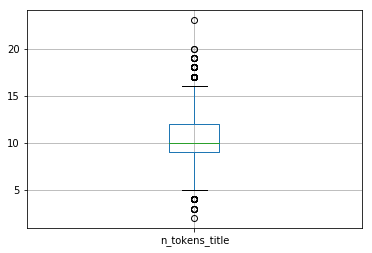

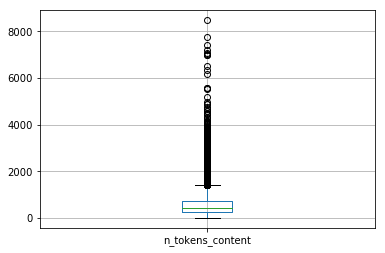

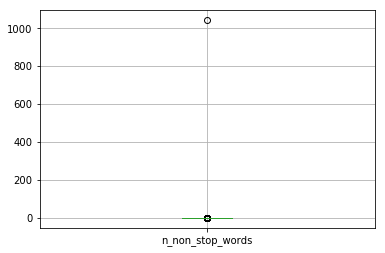

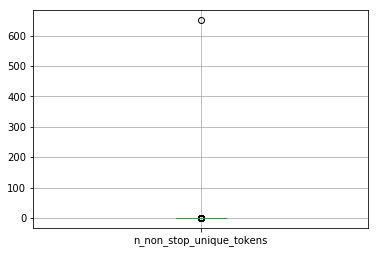

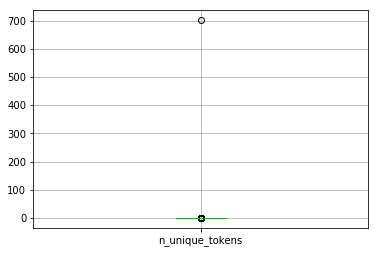

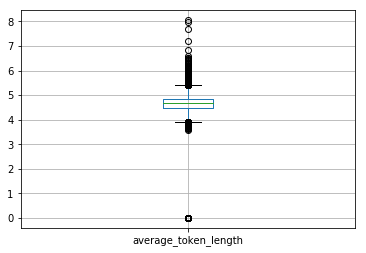

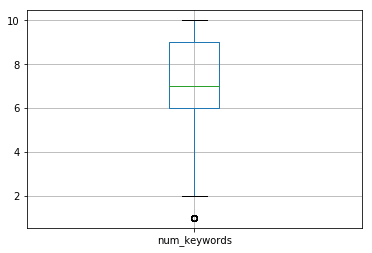

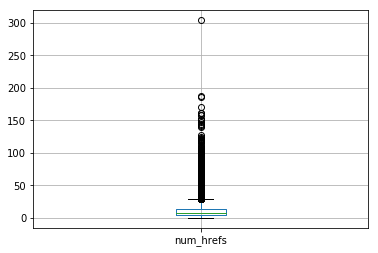

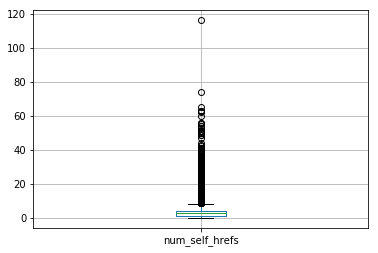

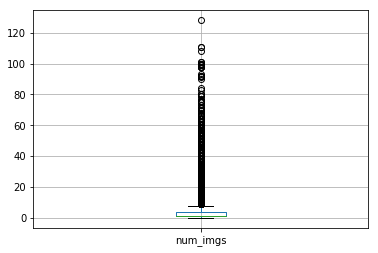

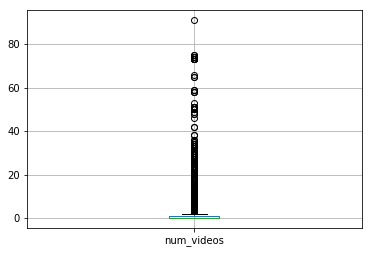

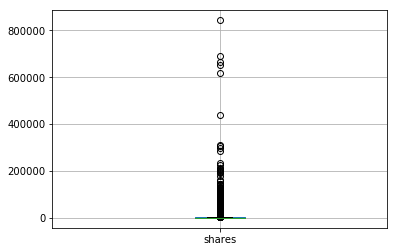

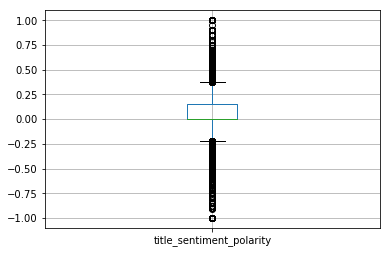

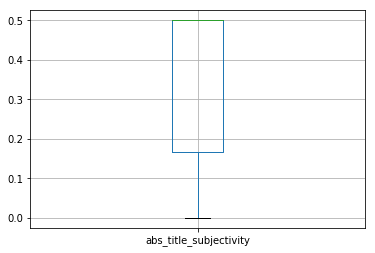

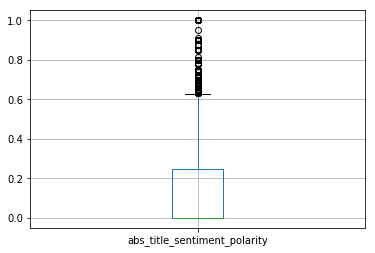

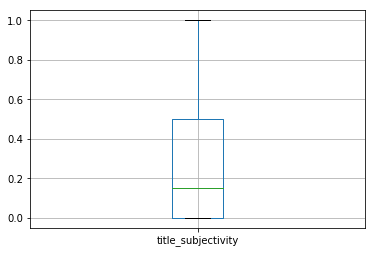

In [8]:
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter('ignore',DeprecationWarning)
%matplotlib inline

for var in imp_features:
    df.boxplot(column=var)
    plt.show()

The Boxplot shows timedelta,n_tokens_title and num_keywords are nearly normally distributed.

Fields like shares, videos, images are right skewed and they have outliers.

Number of tokens in content, n_non_stop_words, n_non_stop_unique_tokens, n_unique_tokens, average token Length, num_keywords, num_hrefs, num_self_hrefs, num_imgs, num_videos, shares has  outliers 

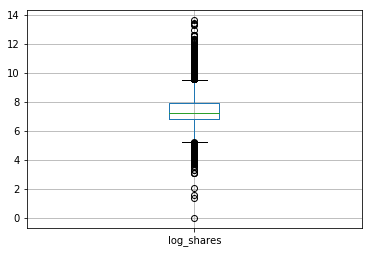

In [9]:
df['log_shares'] = np.log(df.shares)

df.boxplot(column='log_shares')

No of Shares is normally distributed with some outliers after log transform

In [10]:
df[other_features].describe().T

,count,mean,std,min,25%,50%,75%,max
self_reference_min_shares,39644.0,3998.755396,19738.670516,0.00000,639.000000,1200.000000,2600.000000,843300.000000
self_reference_max_shares,39644.0,10329.212662,41027.576613,0.00000,1100.000000,2800.000000,8000.000000,843300.000000
self_reference_avg_sharess,39644.0,6401.697580,24211.332231,0.00000,981.187500,2200.000000,5200.000000,843300.000000
global_subjectivity,39644.0,0.443370,0.116685,0.00000,0.396167,0.453457,0.508333,1.000000
global_sentiment_polarity,39644.0,0.119309,0.096931,-0.39375,0.057757,0.119117,0.177832,0.727841
global_rate_positive_words,39644.0,0.039625,0.017429,0.00000,0.028384,0.039023,0.050279,0.155488
global_rate_negative_words,39644.0,0.016612,0.010828,0.00000,0.009615,0.015337,0.021739,0.184932
rate_positive_words,39644.0,0.682150,0.190206,0.00000,0.600000,0.710526,0.800000,1.000000
rate_negative_words,39644.0,0.287934,0.156156,0.00000,0.185185,0.280000,0.384615,1.000000
avg_positive_polarity,39644.0,0.353825,0.104542,0.00000,0.306244,0.358755,0.411428,1.000000


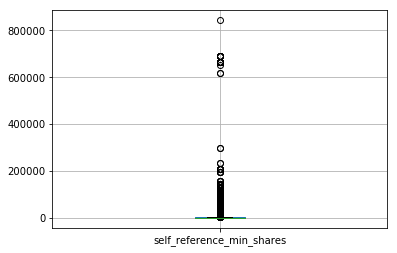

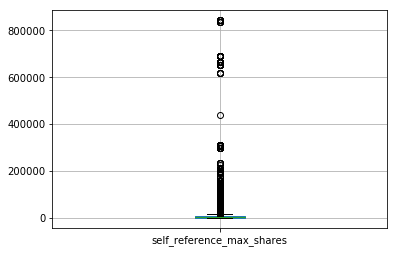

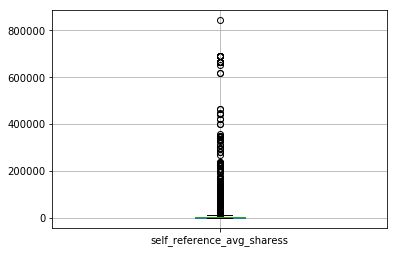

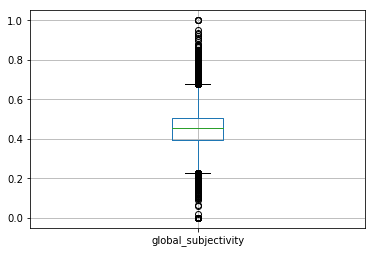

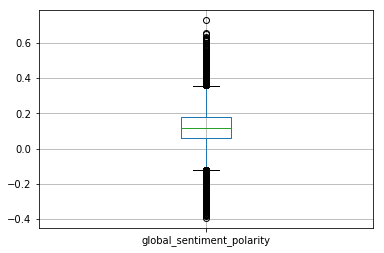

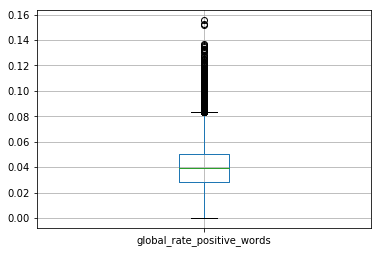

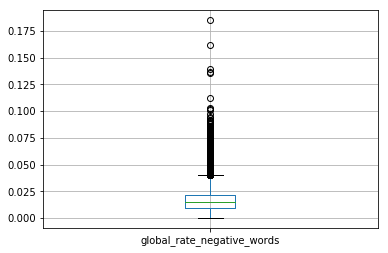

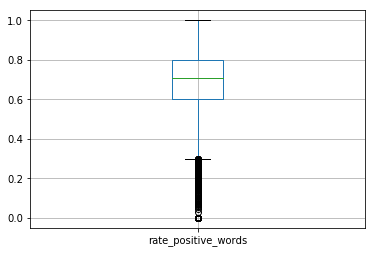

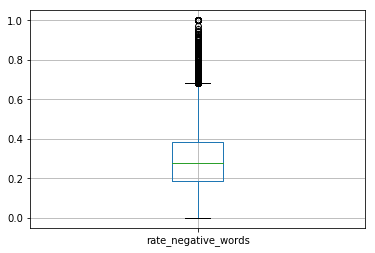

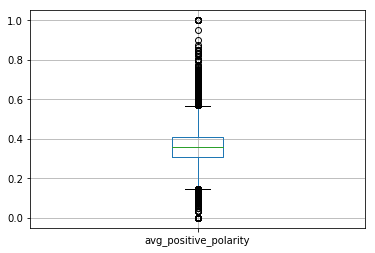

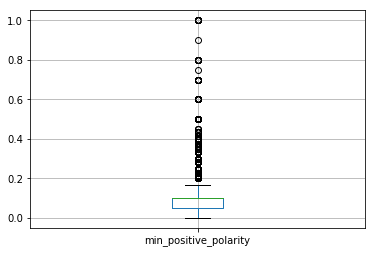

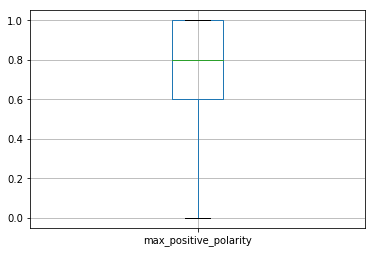

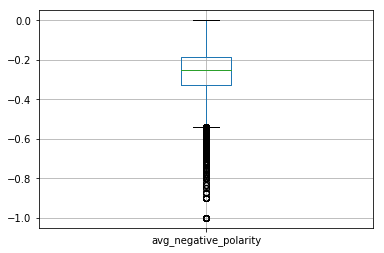

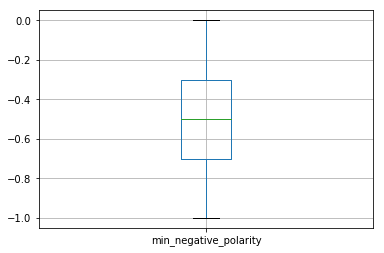

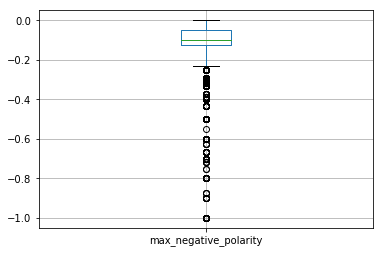

In [11]:
for var in other_features:
    df.boxplot(column=var)
    plt.show()

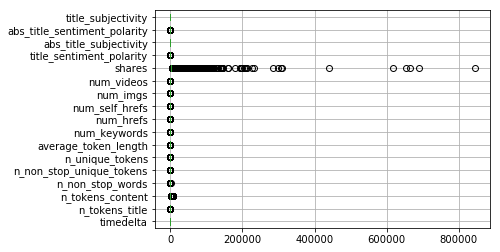

In [12]:
df[imp_features].boxplot(vert=False)

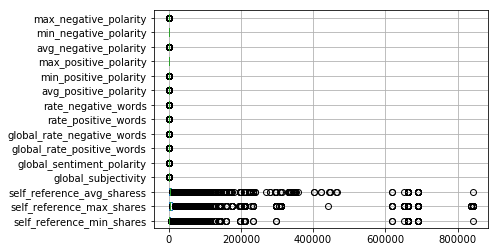

In [13]:
df[other_features].boxplot(vert=False)

In [29]:
import plotly as py
import plotly.figure_factory as FF

hist_data = df.shares
group_labels = ['distplot']
fig = FF.create_distplot(hist_data,  group_labels)
py.image.ishow(fig)

PlotlyError: Oops, this function was written to handle multiple datasets, if you want to plot just one, make sure your hist_data variable is still a list of lists, i.e. x = [1, 2, 3] -> x = [[1, 2, 3]]